# Calculus

Calculation of derivatives is a **crucial step** in nearly all deep learning optimization algorithms.

In deep learning, we typically choose loss functions that are differentiable with respect to our model's parameters.

For each parameter, we can determine how rapidly the loss would increase or decrease, were we to *increase* or *decrease* that parameter by an infinitesimally small amount.

The *derivative* of $f$ at a point $x$ is defined as
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$
Define $u = f(x) = 3x^2-4x$

In [1]:
%matplotlib inline
import numpy as np
from d2l import torch as d2l
from IPython import display


def f(x):
    return 3 * x ** 2 - 4 * x

Setting $x=1$, $\frac{f(x+h) - f(x)}{h}$ approaches $2$ as $h$ approaches $0$

In [2]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


We can visualize the slopes of functions using the `matplotlib` library

In [3]:
def use_svg_display():  
    """Use the svg format to display a plot in Jupyter."""
    #display.set_matplotlib_formats('svg')
    import matplotlib_inline.backend_inline
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):  
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim), axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None, ylim=None,
         xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'),
         figsize=(7, 5), axes=None):
    """Plot data points."""
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None: axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x, y, fmt) if len(x) else axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

Plot the function $u = f(x)$ and its tangent line $y = 2x - 3$ at $x=1$

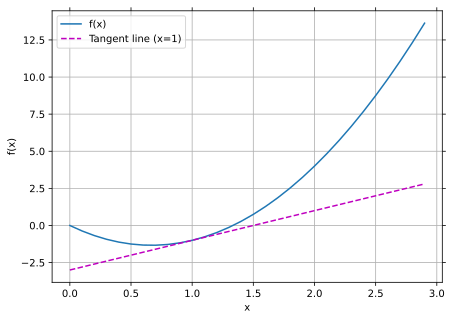

In [4]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

Let $y = f(x_1, x_2, \ldots, x_n)$ be a function with $n$ variables. The *partial derivative* of $y$ with respect to its $i^\mathrm{th}$  parameter $x_i$ is

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$


To calculate $\frac{\partial y}{\partial x_i}$, we can simply treat $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ as constants and calculate the derivative of $y$ with respect to $x_i$.

We can concatenate partial derivatives of a multivariate function with respect to all its variables to obtain the *gradient* vector of the function.

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

*Chain rule* enables us to differentiate composite functions.
Suppose that functions $y=f(u)$ and $u=g(x)$ are both differentiable, then the chain rule states that

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$